In [1]:
import numpy as np
import scipy.optimize as op
import math
from matplotlib import pyplot as plt

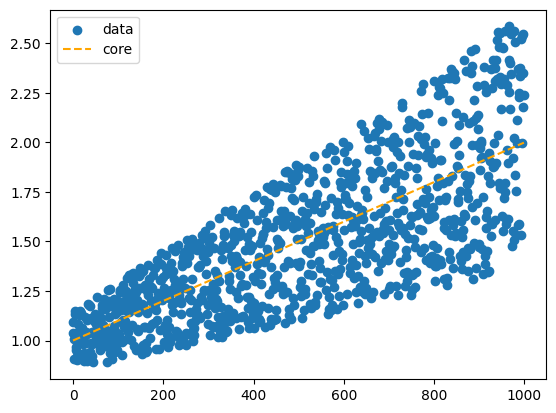

In [2]:
truth = lambda x: 1e-3 * x + 1

n = 1000
x = np.arange(n)
y = truth(x) + (x + 300) / n * (np.random.random(n) - 0.5)

plt.scatter(x, y, label =  "data")
plt.plot(x, truth(x), ls="--", label="core", color="orange")
plt.legend()
plt.show()

# Ordinary Least Square

In [3]:
def ols(w, x, y):
    a, b = w
    res = y - a - b*x
    return np.sum(res**2)

sol = op.minimize(ols, x0 = (0,0), args=(x, y))
sol

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 60.735537277104605
        x: [ 9.990e-01  9.888e-04]
      nit: 2
      jac: [-4.670e-03  4.026e-02]
 hess_inv: [[ 1.997e-03 -2.997e-06]
            [-2.997e-06  6.000e-09]]
     nfev: 132
     njev: 40

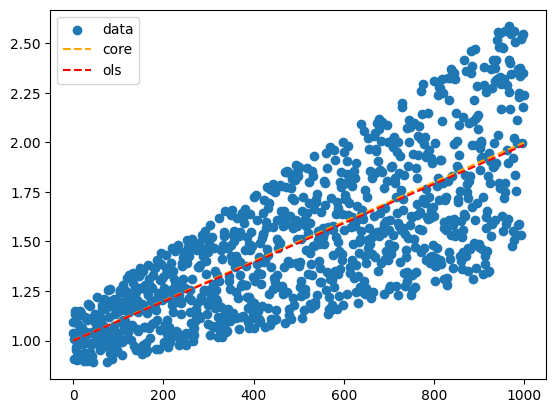

In [4]:
plt.scatter(x, y, label =  "data")
plt.plot(x, truth(x), ls="--", label="core", color="orange")
plt.plot(x, sol['x'][0]+sol['x'][1]*x, ls="--", label="ols", color="red")
plt.legend()
plt.show()

# Quantile Regression

In [5]:
def pinball_loss(q, t):
    return q*np.maximum(t,0) + (1-q)*np.maximum(-t,0)

def qr(w, x, y, q, alpha=0.01):
    a, b = w
    res = 1/x.shape[0]*np.sum(pinball_loss(q, y - a - b*x)) + alpha*(np.sum(np.abs(w)))
    return res

sol_95 = op.minimize(qr, x0 = (0,0), args=(x, y, 0.95))
print(sol_95)
sol_05 = op.minimize(qr, x0 = (0,0), args=(x, y, 0.05))
print(sol_05)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.030610027744149185
        x: [ 1.122e+00  1.475e-03]
      nit: 12
      jac: [ 0.000e+00  1.970e-01]
 hess_inv: [[ 9.639e-01 -7.369e-04]
            [-7.369e-04  2.568e-06]]
     nfev: 223
     njev: 73
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.027019065812830752
        x: [ 8.340e-01  6.075e-04]
      nit: 15
      jac: [ 2.328e-10 -4.657e-10]
 hess_inv: [[ 5.660e+00 -1.147e-02]
            [-1.147e-02  2.510e-05]]
     nfev: 144
     njev: 48


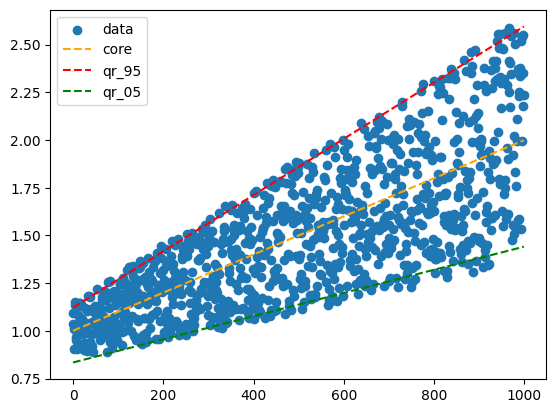

In [6]:
plt.scatter(x, y, label =  "data")
plt.plot(x, truth(x), ls="--", label="core", color="orange")
plt.plot(x, sol_95['x'][0]+sol_95['x'][1]*x, ls="--", label="qr_95", color="red")
plt.plot(x, sol_05['x'][0]+sol_05['x'][1]*x, ls="--", label="qr_05", color="green")
plt.legend()
plt.show()

# Ridge Regression

In [7]:
def ridge(w, x, y, alpha=0.1):
    a, b = w
    return np.sum((y - a - b*x)**2) + alpha*np.sum(w**2)

sol = op.minimize(ridge, x0=(0, 0), args=(x, y))
sol

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 60.83529447615105
        x: [ 9.986e-01  9.894e-04]
      nit: 2
      jac: [-4.687e-03  3.800e-02]
 hess_inv: [[ 1.996e-03 -2.996e-06]
            [-2.996e-06  5.998e-09]]
     nfev: 138
     njev: 42

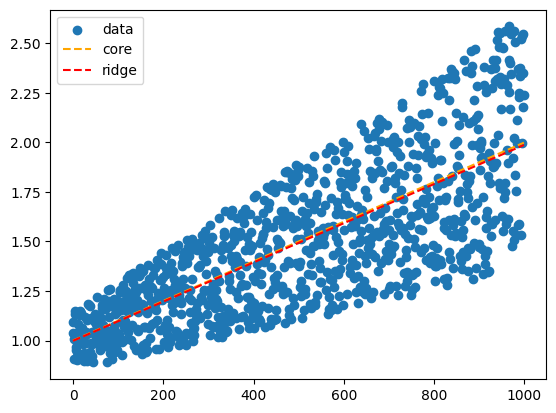

In [8]:
plt.scatter(x, y, label =  "data")
plt.plot(x, truth(x), ls="--", label="core", color="orange")
plt.plot(x, sol['x'][0]+sol['x'][1]*x, ls="--", label="ridge", color="red")
plt.legend()
plt.show()

# Lasso Regression

In [9]:
def lasso(w, x, y, alpha=0.1):
    a, b = w
    return np.sum((y - a - b*x)**2) + alpha*np.sum(np.abs(w))

sol = op.minimize(lasso, x0=(0, 0), args=(x, y))
sol

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 60.83552462724697
        x: [ 9.988e-01  9.891e-04]
      nit: 2
      jac: [-4.689e-03  4.069e-02]
 hess_inv: [[ 1.997e-03 -2.997e-06]
            [-2.997e-06  6.000e-09]]
     nfev: 147
     njev: 45

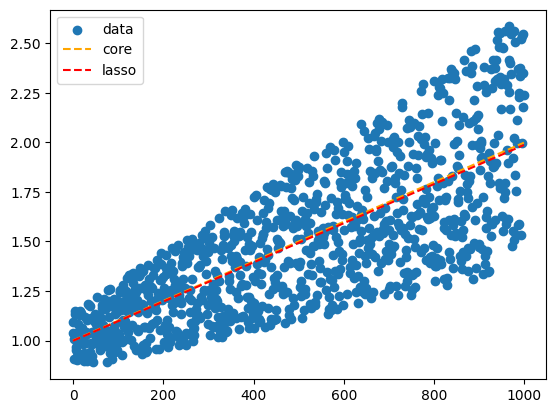

In [10]:
plt.scatter(x, y, label =  "data")
plt.plot(x, truth(x), ls="--", label="core", color="orange")
plt.plot(x, sol['x'][0]+sol['x'][1]*x, ls="--", label="lasso", color="red")
plt.legend()
plt.show()

# Elastic-Net Regression

In [11]:
def elastic_net(w, x, y, alpha=0.01, l1_ratio=0.5):
    if (l1_ratio > 1) or (l1_ratio < 0):
        print("Not satisfy condition: 0 =< l1_ratio <= 1 ")
        raise ValueError
    a, b = w
    return 1/(2*x.shape[0])*np.sum((y - a - b*x)**2) + alpha*l1_ratio*np.sum(np.abs(w)) + alpha*(1-l1_ratio)/2*np.sum(w**2)

sol = op.minimize(elastic_net, x0=(0, 0), args=(x, y))
sol

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.037667262285095676
        x: [ 9.599e-01  1.047e-03]
      nit: 4
      jac: [ 1.397e-09  1.397e-09]
 hess_inv: [[ 3.916e+00 -5.877e-03]
            [-5.877e-03  1.182e-05]]
     nfev: 18
     njev: 6

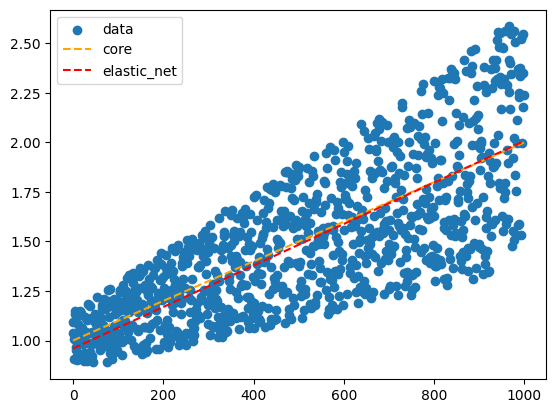

In [12]:
plt.scatter(x, y, label =  "data")
plt.plot(x, truth(x), ls="--", label="core", color="orange")
plt.plot(x, sol['x'][0]+sol['x'][1]*x, ls="--", label="elastic_net", color="red")
plt.legend()
plt.show()